# Resampling Datetime Data

The assignment is split into 2 parts:

- Part 1: Load the data and create a datetime index

- Part 2: Answer 2 Questions using visualizations and the correct frequency data

## Part 1) Load the data and make a datetime index.

You must first load the data and create a datetime index.

1. Convert the date column to datetime dtype.
2. Set the date column as the index.
3. Filter out only the required data:
 - Keep only data from the year 2000 or later.
 - Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth

4. Impute any missing values.
- Think about each feature and what imputation method makes sense. You may not be able to use the same method for every feature!

---

## Loading Data 

In [128]:
import pandas as pd 
import datetime as dt
from matplotlib import dates as mdates
import matplotlib.ticker as mticks
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']

[6.4, 4.8]

In [129]:
url ="https://docs.google.com/spreadsheets/d/e/2PACX-1vQm0_xz5UTuvoPlFvH2pYEBXOa3rd8WHgWtVsFDlDSyF40860R8rmhklbyjYRwRUMatxyi24cnLPy_Q/pub?gid=1198589591&single=true&output=csv"
df = pd.read_csv(url)
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0


In [130]:
pd.to_datetime(df['date'])


0       1970-01-01 00:00:00.019790101
1       1970-01-01 00:00:00.019790102
2       1970-01-01 00:00:00.019790103
3       1970-01-01 00:00:00.019790104
4       1970-01-01 00:00:00.019790105
                     ...             
15336   1970-01-01 00:00:00.020201227
15337   1970-01-01 00:00:00.020201228
15338   1970-01-01 00:00:00.020201229
15339   1970-01-01 00:00:00.020201230
15340   1970-01-01 00:00:00.020201231
Name: date, Length: 15341, dtype: datetime64[ns]

In [131]:
df['date'].sample(n=10).sort_index()

443      19800319
845      19810425
2805     19860906
5574     19940406
7687     20000118
10978    20090121
11014    20090226
12481    20130304
12582    20130613
13738    20160812
Name: date, dtype: int64

In [132]:
df['date_temp'] = pd.to_datetime(df['date'],format = '%Y%m%d')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  date_temp         15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,date_temp
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,1979-01-03
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,1979-01-04
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,1979-01-05


Setting Index

In [133]:
df = df.drop(columns= ['date'])
df.head(2)

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,date_temp
0,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,1979-01-01
1,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,1979-01-02


In [134]:
df_in = df.set_index("date_temp")
df_in.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date_temp,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [135]:
df_in.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date_temp', length=15341, freq=None)

#### Filtering Columns 

In [136]:
keep_cols = ['precipitation','mean_temp','min_temp','max_temp','snow_depth']
df_in = df_in[keep_cols]
df_in

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date_temp,,,,,
1979-01-01,0.4,-4.1,-7.5,2.3,9.0
1979-01-02,0.0,-2.6,-7.5,1.6,8.0
1979-01-03,0.0,-2.8,-7.2,1.3,4.0
1979-01-04,0.0,-2.6,-6.5,-0.3,2.0
1979-01-05,0.0,-0.8,-1.4,5.6,1.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


In [137]:
df_in.loc['2000':'2020']

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date_temp,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


#### Impute missing values. 

In [138]:
df_in.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

We will use the interpolate method to impute missing values for mean, max and min temp as those values are temperatures and we can see that the values are recorded daily so it would make sense to use . 

In [139]:
df_in['mean_temp'] = df_in['mean_temp'].interpolate()
df_in['min_temp'] = df_in['min_temp'].interpolate()
df_in['max_temp'] = df_in['max_temp'].interpolate()

In [140]:
df_in.isna().sum()

precipitation     390
mean_temp           0
min_temp            0
max_temp            0
snow_depth       1752
dtype: int64

Now we will use fillna to replace NaN values, as we can safely assume those can be 0.  

In [141]:
df_in['precipitation'] = df_in['precipitation'].fillna(0)
df_in['snow_depth'] = df_in['snow_depth'].fillna(0)

In [142]:
df_in.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

---

## Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

- For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Plot the feature that the question is asking about.
  - If there is a specific time period, plot only that time period.

Note: you may want to make a temporary DataFrame that you will use to answer this question only.

---

## Q1: What month had the most precipitation between 2000 through 2010?

- Resample the data as Monthly frequency.
- Find the date and corresponding value for the max precipitation.
- Plot the feature and time period that corresponds to the question.
 - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the most precipitation (the max precipitation).
- Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.
 - Make sure to add a legend so that your label is visible.

---

### Q1 Visualization Requirements

- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
- Create a wide figure (e.g. figsize=(12,3))
 - With the title "Precipitation for 2000-2010"
 - With a ylabel of "Inches"
- Customize the major xaxis ticks to:
 - Have major xaxis ticks every 1 year.
 - Use 4-digit years for the labels
 - Rotate the major ticks' labels 90 degrees.
- Customize the minor xaxis ticks to:
 - Have minor xaxis ticks every 3 months
 - Do not label the minor ticks.

---

In [143]:
prec_cols = ['snow_depth','precipitation']
df_in = df_in.loc["2000":"2010",prec_cols]
df_in

,snow_depth,precipitation
date_temp,,
2000-01-01,0.0,0.0
2000-01-02,0.0,0.2
2000-01-03,0.0,6.0
2000-01-04,0.0,0.2
2000-01-05,0.0,0.8
...,...,...
2010-12-27,1.0,5.0
2010-12-28,0.0,0.4
2010-12-29,0.0,1.4


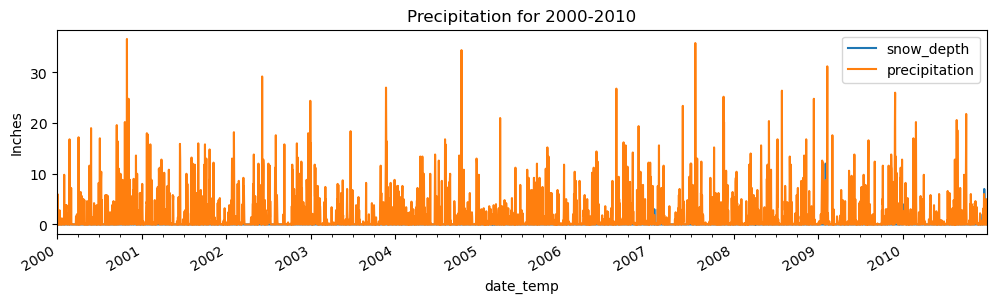

In [161]:
ax = df_in.plot(figsize=(12,3))
ax.set(title = 'Precipitation for 2000-2010', ylabel='Inches')

major_loc = mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

minor_loc = mdates.MonthLocator(interval=3)

ax.xaxis.set_minor_locator(minor_loc)

ax

fig = ax.get_figure()
fig.autofmt_xdate()


In [145]:
df_in.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2010-12-22', '2010-12-23', '2010-12-24', '2010-12-25',
               '2010-12-26', '2010-12-27', '2010-12-28', '2010-12-29',
               '2010-12-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date_temp', length=4018, freq=None)

In [146]:
df_in.max()

snow_depth       12.0
precipitation    36.6
dtype: float64

In [147]:
date_max_precip = df_in['precipitation'].idxmax()
max_precip = df_in['precipitation'].max()

print(f"The highest daily preciptation was {max_precip} inches, which occured on {date_max_precip.strftime('%B %d, %Y')} which was a Wednesday.")


The highest daily preciptation was 36.6 inches, which occured on October 29, 2000 which was a Wednesday.


In [148]:
df_ts = df_in.resample("M").last()
df_ts

,snow_depth,precipitation
date_temp,,
2000-01-31,0.0,0.0
2000-02-29,0.0,5.6
2000-03-31,0.0,0.0
2000-04-30,0.0,0.0
2000-05-31,0.0,1.4
...,...,...
2010-08-31,0.0,0.0
2010-09-30,0.0,1.8
2010-10-31,0.0,3.4


In [149]:
df_ts.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', name='date_temp', length=132, freq='M')

In [ ]:
major_loc = mdates.YearLocator()
major_fmt = mdates.DateFormatter("%B-%Y")
minor_loc = mdates.MonthLocator(interval=3)

TypeError: cannot unpack non-iterable AxesSubplot object

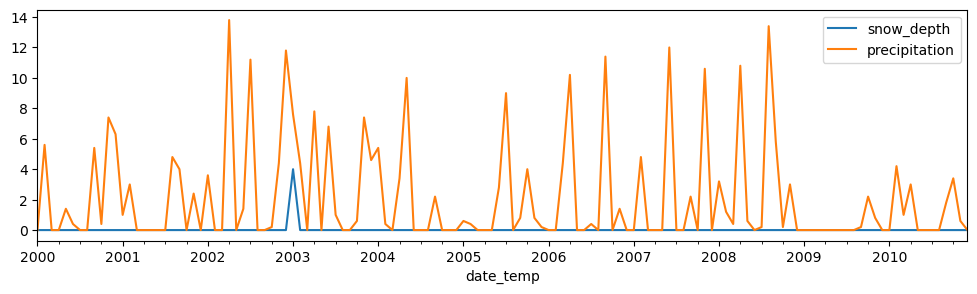

In [166]:
fig, ax = df_ts.plot(figsize=(12,3))
ax.set( ylabel='Inches',title= 'Precipitation for 2000-2010')

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

ax.xaxis.set_minor_locator(minor_loc)

fig = ax.get_figure()
fig.autofmt_xdate(rotation=90,ha='center');


## Q2: Which year between 2000-2020 had the coolest average temperature?

- Resample the data as Yearly frequency.

- Plot the feature and time period that corresponds to the question.
 - Make sure to meet the "Visualization Requirements" below!
- Determine the date and value for the lowest mean temp.
- Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.



---

### Q2 Visualization Requirements

- Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
 - Create a wide figure (e.g. figsize=(12,3))
  - With the title "Average Temperature"
  - With a ylabel of "Degrees"
- Customize the major xaxis ticks to:
 - Have major xaxis ticks every 5 years.
 - Use 4-digit years for the labels
 - Rotate the major ticks' labels 90 degrees.
- Customize the minor xaxis ticks to:
 - Have minor xaxis ticks every 1 year
 - Do not label the minor ticks.

---